
۱- روش گرادیان کاهشی: تعداد اپک را تغیر دهید که دقت نزدیک به روش معادلات نرمال باشد
۲- تعداد نمونه ها / تعداد ویژگی ها را آنقدر زیاد کنید که روش معادلات نرمال از حیث زمان اجرا از گرادیان کاهشی عقب بیفتد یا با مشکل کمبود حافظه مواجه شوید

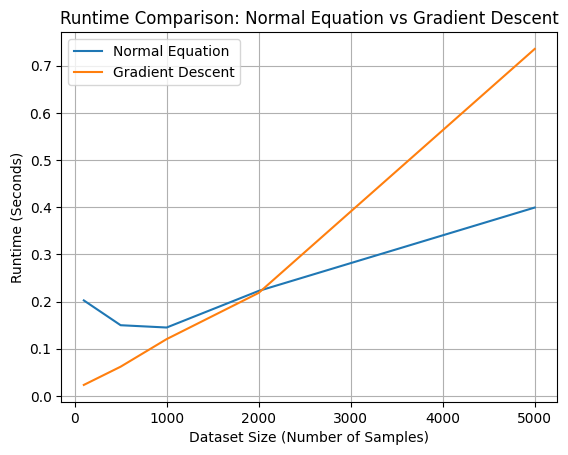

In [3]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Dataset sizes to test
dataset_sizes = [100, 500, 1000, 2000, 5000]
normal_eq_times = []
gd_times = []

for m in dataset_sizes:
    n = 1000  # Number of features
    # Generate dataset
    X = 2 * np.random.rand(m, n)
    y = 4 + 3 * X[:, 0] + np.random.randn(m)
    X_b = np.c_[np.ones((m, 1)), X]

    # Normal Equation
    start_time = time.time()
    theta_normal_eq = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    normal_eq_times.append(time.time() - start_time)

    # Gradient Descent Parameters
    eta = 0.1  # Learning rate
    n_iterations = 100
    m = len(X_b)

    # Gradient Descent
    theta_gd = np.random.randn(n + 1, 1)
    start_time = time.time()
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta_gd) - y.reshape(-1, 1))
        theta_gd -= eta * gradients
    gd_times.append(time.time() - start_time)

# Plot runtime comparison
plt.plot(dataset_sizes, normal_eq_times, label="Normal Equation")
plt.plot(dataset_sizes, gd_times, label="Gradient Descent")
plt.xlabel("Dataset Size (Number of Samples)")
plt.ylabel("Runtime (Seconds)")
plt.title("Runtime Comparison: Normal Equation vs Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()